# VGG16で転移学習

In [1]:
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
from keras.callbacks import CSVLogger

Using TensorFlow backend.


In [2]:
n_categories = 5
batch_size = 32
is_save_model = False
# 画像サイズ
H = 224
W = 224
C = 3
# ディレクトリ
train_dir = './data/train'
validation_dir = './data/validation'
file_name = './model/cnn'

# データの取得

In [3]:
# 学習データ
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,  # これ以降は多分水増し関係の設定
    zoom_range=0.2,
    horizontal_flip=True  # 画像を取得するときにランダムに反転する
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(H, W),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# 検証データ
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(H, W),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 250 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


(32, 224, 224, 3) 0.0 1.0


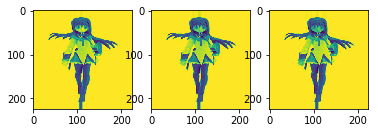

In [4]:
# 訓練画像表示
index = 0
img = train_generator.__getitem__(0)[0]
print(img.shape, img.min(), img.max())
img_index = img[index]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img_index[:, :, i])

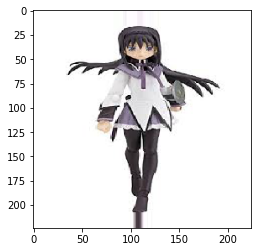

In [5]:
plt.imshow(img_index)

# モデル作成

In [6]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_tensor=Input(shape=(H, W, 3)))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
prediction = Dense(n_categories, activation='softmax')(x)

W0329 16:54:28.890795  4796 deprecation_wrapper.py:119] From C:\Users\tak-o\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 320s 5us/step


In [7]:
model = Model(inputs=base_model.input, outputs=prediction)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
# VGG16の前から14層の重みを固定
for layer in base_model.layers[:15]:
    layer.trainable = False

In [10]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

# 学習

In [12]:
is_save_model = True

In [13]:
# ログの保存ファイル
if is_save_model:
    callbacks = [CSVLogger(file_name+'.csv')]
else:
    callbacks = None

In [14]:
# 学習
hist = model.fit_generator(train_generator,
                           epochs=200,
                           verbose=1,
                           validation_data=validation_generator,
                           callbacks=callbacks)

W0329 16:59:51.598138  4796 deprecation_wrapper.py:119] From C:\Users\tak-o\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/200
8/8 [==============================] - 12s 2s/step - loss: 1.6829 - accuracy: 0.1760 - val_loss: 1.6212 - val_accuracy: 0.2067
Epoch 2/200
8/8 [==============================] - 2s 287ms/step - loss: 1.6568 - accuracy: 0.1640 - val_loss: 1.6187 - val_accuracy: 0.2000
Epoch 3/200
8/8 [==============================] - 3s 339ms/step - loss: 1.6398 - accuracy: 0.1440 - val_loss: 1.6289 - val_accuracy: 0.1800
Epoch 4/200
8/8 [==============================] - 3s 354ms/step - loss: 1.6242 - accuracy: 0.1400 - val_loss: 1.5905 - val_accuracy: 0.1600
Epoch 5/200
8/8 [==============================] - 3s 360ms/step - loss: 1.6185 - accuracy: 0.1760 - val_loss: 1.6172 - val_accuracy: 0.1733
Epoch 6/200
8/8 [==============================] - 3s 353ms/step - loss: 1.6153 - accuracy: 0.1280 - val_loss: 1.6052 - val_accuracy: 0.2000
Epoch 7/200
8/8 [==============================] - 3s 345ms/step - loss: 1.6110 - accuracy: 0.1520 - val_loss: 1.6174 - val_accuracy: 0.2133
Epoch 8/200
8/8

Epoch 59/200
8/8 [==============================] - 3s 331ms/step - loss: 1.2971 - accuracy: 0.6400 - val_loss: 1.3514 - val_accuracy: 0.5733
Epoch 60/200
8/8 [==============================] - 3s 348ms/step - loss: 1.2870 - accuracy: 0.6640 - val_loss: 1.4018 - val_accuracy: 0.5600
Epoch 61/200
8/8 [==============================] - 3s 352ms/step - loss: 1.2714 - accuracy: 0.6720 - val_loss: 1.3727 - val_accuracy: 0.5333
Epoch 62/200
8/8 [==============================] - 3s 332ms/step - loss: 1.2643 - accuracy: 0.6560 - val_loss: 1.3690 - val_accuracy: 0.5400
Epoch 63/200
8/8 [==============================] - 3s 327ms/step - loss: 1.2571 - accuracy: 0.6360 - val_loss: 1.4278 - val_accuracy: 0.5733
Epoch 64/200
8/8 [==============================] - 3s 339ms/step - loss: 1.2271 - accuracy: 0.6960 - val_loss: 1.2698 - val_accuracy: 0.5733
Epoch 65/200
8/8 [==============================] - 3s 345ms/step - loss: 1.2277 - accuracy: 0.6920 - val_loss: 1.3129 - val_accuracy: 0.5600
Epoch 

8/8 [==============================] - 2s 296ms/step - loss: 0.1492 - accuracy: 0.9840 - val_loss: 0.4714 - val_accuracy: 0.8200
Epoch 174/200
8/8 [==============================] - 2s 307ms/step - loss: 0.1700 - accuracy: 0.9760 - val_loss: 0.4733 - val_accuracy: 0.7933
Epoch 175/200
8/8 [==============================] - 2s 310ms/step - loss: 0.1686 - accuracy: 0.9720 - val_loss: 0.8406 - val_accuracy: 0.8067
Epoch 176/200
8/8 [==============================] - 2s 286ms/step - loss: 0.1594 - accuracy: 0.9720 - val_loss: 0.5311 - val_accuracy: 0.8067
Epoch 177/200
8/8 [==============================] - 2s 303ms/step - loss: 0.1454 - accuracy: 0.9720 - val_loss: 0.5163 - val_accuracy: 0.8000
Epoch 178/200
8/8 [==============================] - 2s 302ms/step - loss: 0.1429 - accuracy: 0.9760 - val_loss: 0.1852 - val_accuracy: 0.7933
Epoch 179/200
8/8 [==============================] - 3s 318ms/step - loss: 0.1430 - accuracy: 0.9800 - val_loss: 0.5983 - val_accuracy: 0.8067
Epoch 180/200

In [15]:
# 「モデル構造、モデルの重み、学習時の設定、optimizerの状態」を保存
if is_save_model:
    model.save(file_name + '.h5')

# 結果

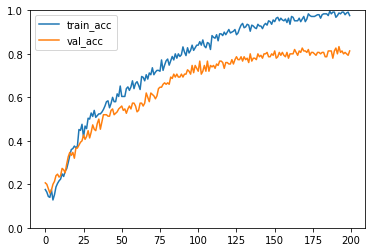

In [16]:
# 精度の変化
plt.plot(hist.history['accuracy'], label='train_acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.ylim(0, 1)
plt.legend()